# Goal
This notebook contains a few algorithms in the course intro to computer vision and their implementations in python
## list of algorithms
1. 
## list of libraries and frameworks needed
the libraries used
- numpy
- pytorch
- matplotlib
- and some more...
- TBD

# Fourier Transform

The 2D fourier transforms is given in wolfram alpha
- [https://www.wolframalpha.com/input?i=FourierTransform%5Bsin%28x%29%2Bcos%28y%29%2C%7Bx%2Cy%7D%2C%7Bu%2Cv%7D%5D]
- [https://math.stackexchange.com/questions/780976/computing-2d-radially-symmetric-fourier-transforms-with-wolfram-alpha]


# Shannons sampling theorem


## The sampling theorem
The sampling theorem state that  

---
let $f(x)$ be a continous function. We will assume that the 'most high frequency of $f(x)$ is $\omega$'  

Then $f(x)$ can be recovered from each sample in frequency higher than $2\omega$


The `most high frequency` of $f(x)$ came from the fourier series of f. 

Let $F(u) = \int_{x=-\infty}^{\infty} {f(x)e^{-2\pi ux}dx}$ be the fourier transform of $f(x)$

By the properties of fourier transform and fourier series we know, that each function $f(x)$ can be described as a sum of cosin and sins with some frequencies


---

The following link may help
https://www.youtube.com/watch?v=FcXZ28BX-xE



### question from exam 2013

1.1	LET F(X) BE A FUNCTION. HOW CAN IT BE RESAMPLE?

For simplicity, we will assume we can apply on f(x) the continuous fourier transform. If we can not, all the reconstruction process is "invalid. We know that f(x) is composed from some sin() and cos() signals  with different frequencies (Fourier series).  
The highest (u) with $ F(u)\ne 0 $ when F is the fourier transform of f, is the hihest frequency appears in the fourier series of f.  
If F is with `finite support` (i.e $\exists_{B} \forall_{|u|>B}(F(u)=0)$) it can be recovered in the lowest sampling frequency of 2B.

This is a lower bound in some cases, and in some cases the function can be recovered in even lower frequency. however, If the sampling frequency is `uniform`, the Shannon's bound is mandatory




In [2]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import cmath

def DFT2D(image):
    data = np.asarray(image)
    M, N = image.size # (img x, img y)
    dft2d = np.zeros((M,N),dtype=complex)
    for k in range(M):
        for l in range(N):
            sum_matrix = 0.0
            for m in range(M):
                for n in range(N):
                    e = cmath.exp(- 2j * np.pi * ((k * m) / M + (l * n) / N))
                    sum_matrix +=  data[m,n,1] * e
            dft2d[k,l] = sum_matrix
    return dft2d
# this code is not relly efficient since running in for loops and not with torch operations
img = PIL.Image.open("/home/azureuser/cloudfiles/code/Users/209056712/IntroToCVfinals/new_bnw.jpg")
# plt.imshow(img)
img2 = img.resize((50,50))
# plt.imshow(img2)
dft = DFT2D(img2)
plt.imshow(dft.real)
# pass image through a low pass filter

# Apply low pass filter on an image


Apply gaussian blur to an image centered in the center of the image

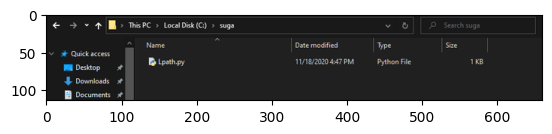

In [28]:
# we will use PIL for that
from PIL import Image,ImageFilter
from matplotlib import pyplot as plt
image = Image.open(r'/home/azureuser/cloudfiles/code/Users/209056712/IntroToCvFinals/some_image.png')
image_filter = image.filter(ImageFilter.GaussianBlur)
image.show()
plt.show(image)
image_filter.show()


In [ ]:
import torch.fft
import torch
import torchvision
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img = Image.open(r'new_bnw.jpg')
img = img.convert(mode='L')
img = np.array(img)
img = torch.from_numpy(img)
print(img.shape)  # (512, 512)

fft_img = torch.fft.fft(img)
print(fft_img)  # torch.Size([512, 512])
# convert torch to an image
torchvision.transforms.functional.to_pil_image(pic=fft_img,mode='L')


torch.Size([2832, 4256])
tensor([[153396.0000+0.0000j, -25890.1953-3355.9980j,
           5932.5947-10229.9375j,  ...,
         -19528.1523-9555.6582j,   5932.5947+10229.9375j,
         -25890.1953+3355.9980j],
        [153994.0000+0.0000j, -25437.0117-4117.2910j,
           5530.1616-10598.5117j,  ...,
         -19414.6016-9155.8867j,   5530.1616+10598.5117j,
         -25437.0117+4117.2910j],
        [152802.0000+0.0000j, -25206.6328-4314.8037j,
           4979.6367-9898.8037j,  ...,
         -19285.7266-9880.0195j,   4979.6367+9898.8037j,
         -25206.6328+4314.8037j],
        ...,
        [ 36369.0000+0.0000j, -13652.7617-1162.3975j,
           8174.8359+1343.2800j,  ...,
           4718.9814+1418.7037j,   8174.8359-1343.2800j,
         -13652.7617+1162.3975j],
        [ 34409.0000+0.0000j, -12182.8145-1496.2539j,
           6997.1436+1092.4060j,  ...,
           5341.0122+1102.9846j,   6997.1436-1092.4060j,
         -12182.8145+1496.2539j],
        [ 33543.0000+0.0000j, -11013.3

ValueError: Incorrect mode (L) supplied for input type <class 'numpy.dtype'>. Should be None

# Transformations
## Apply Affine trnasformation on an image
Recall affine transformation is an ISOMETRIC - preserve parallelism, space and angles. by default, affine contains only 2 parts - rotation and translation, and it described by the following matrix

$$
\begin{equation*}
B = 
\begin{bmatrix}
cos(\alpha) & -sin(\alpha) & t_x \\
sin(\alpha) & cos(\alpha) & t_y \\
0 & 0 & 1
\end{bmatrix}
\end{equation*}
$$

When 
- $t_x$ is the translation in the x direction and $t_y$ the translation in the y direction
- $\alpha$ is the rotation matrix.
- the new Z coordinate of a point $(x,y,z)$ is defined by the multiplication
$$
\begin{equation*}
v = 
\begin{bmatrix}
cos(\alpha) & -sin(\alpha) & t_x \\
sin(\alpha) & cos(\alpha) & t_y \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
           x \\
           y \\
           z
         \end{bmatrix}
= 
\begin{bmatrix}
\vdots \\
1*z
\end{bmatrix}
\end{equation*}
$$

so the Z value is kept by this multiplication. Be default, the translation will be changed if the original Z value is not 1 (it will be scaled propely)

Hence, `affine` transformation is not the same for each depth `Z` (as we would expect). Also, from pure math properties, we can say that the translation is scaled up in that way:
$$ x_{new} = x_{old} +t_x*z_{old} $$
so the translation - the distance point P is moving in the x direction is *larger* when the point is farther from the camera. This concept will come back when we will calculate optical flow.




### code implementation 
The default mode of PIL transformation is given by Image.
Additional data would not be submitted. The only data we will have to give is the translation we want and the angle to do the transformation

```python
with Image.open(r'filepath') as image_object:
    alpha = math.pi / 15.
    image_object.transform((
        math.cos(alpha), math.sin(alpha), 20,
        -math.sin(alpha), math.cos(alpha), 20,
        ))
```  

In [15]:
from PIL import Image
import math
from matplotlib import pyplot as plt
plt.ion()
with Image.open(r'./new_baby.png') as image_object:
    alpha = math.pi / 15.
    new_object = image_object.transform(data=(
        math.cos(alpha), math.sin(alpha), 20,
        -math.sin(alpha), math.cos(alpha), 20,
        ),method=Image.AFFINE,size=(1000,1000)
    )
    plt.show(new_object)
    


## Apply Homography on an image
One of the important course concepts.
we will try to give illustration about the process

Homography is detected by 8 points
- 4 points, $\wr(x_i,y_i)\wr$  $i=1...4$ from the origin
- 4 points in the destination $\wr(a_i,b_i)\wr$  $i=1...4$ - the function H will be have to satisfy


$$ H((x_i,y_i)) = (a_i,b_i) $$

The Homography has 8 degree of freedom, and it can be determined by a 3 by 3 Matrix with 1 in the bottom right
corner  


$$
\begin{equation*}
B = 
\begin{bmatrix}
a & b & c \\
d & e & f \\
g & h & 1
\end{bmatrix}
\end{equation*}
$$

A way to implement is py applying image transfrom  






```python
# when img is PIL image
from PIL import image
transformed_img = img.transform(
        size=(new_width, new_height),
        method=Image.PERSPECTIVE,
        data=homography_param,
        resample=Image.BICUBIC
    )
```

condider the following image PIL feature

```python
class QuadTransform(Transform):
    """
    Define a quad image transform.

    Maps a quadrilateral (a region defined by four corners) from the image to a
    rectangle of the given size.

    See :py:meth:`~PIL.Image.Image.transform`

    :param xy: An 8-tuple (x0, y0, x1, y1, x2, y2, x3, y3) which contain the
        upper left, lower left, lower right, and upper right corner of the
        source quadrilateral.
    """

    method = Image.QUAD
```


this is a rectangle


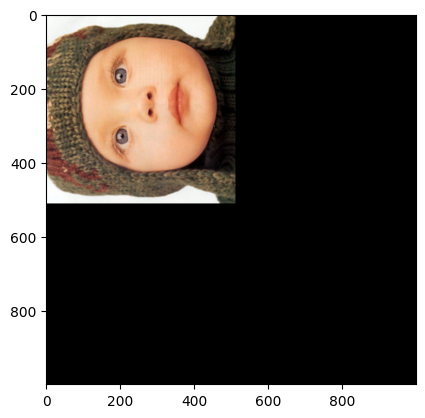

In [17]:
# simple image transform
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open(mode='r',fp=r'./new_baby.png')
plt.ion()
new_image = image.transform(
    method=Image.QUAD,
    data=(0,0,1000,0,1000,1000,0,1000),
    size=(1000,1000)
)
# QUAD is 4 points to 4 points transformation. the defalut is to insert the new 'crop' to init at (0,0)
# returning a new image of a given size (`PIL.Image`)
# again we will present with `pyplotlib`
plt.show(new_image)


as you see, homography can be relly unclear from the first site. Things that are not kept


*   Distance (between points)
*   *Parallel lines*
And all the image structure might be changed

The **Data** argument is a 4 points ordered within a tuple, they are the *edges* of a quadradic shape (מרובע) taken from the image

### How to recover homogrhapy that was done on 2 images?

The question we want to tackle - let's say we have got image A, of a baby. We have passwd it to unknown homography, and got image B. Can we, given image A and image B, recover the homography parameters?

Since Homography is vector marix multiplication, linear algebra would state we would need 8 equations for that (since we have got 8 params)
#### important!
in order to recover, we would need also *correspondence!* since we need to solve equations from the sort
$$
\begin{equation*}
\begin{bmatrix}
u \\
v \\
1
\end{bmatrix}
= 
\begin{bmatrix}
a & b & c \\
d & e & f \\
g & h & 1
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
1
\end{bmatrix}
\end{equation*}
$$

we need to find (or to know) for (x,y) the matched (u,v) in the other frame.
In general, this would lead us **to 9x9 matrix!**



A proper function for that exists in the *OPENCV library* under this link

A general algorithm for that is given by the **SVD** decomposition of the matrix. See also [https://math.stackexchange.com/questions/3509039/calculate-homography-with-and-without-svd]





In [ ]:
def find_homography(image1,image2)
"""
This function is used to find homography between image1 and image2
If there is no possible homography between the images, this shoud return an error
"""
    